<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9.5: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy

## Load data

In [2]:
input_file = 'C:/Users/carls/OneDrive/Desktop/IOD/Data/ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [3]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [4]:
text = re.sub(r'[="]', '', text)
print(text[:1000])

USS Enterprise (NCC-1701-D)

For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

History
Construction and launch
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was the site of

## Helper method

In [5]:
def plot_words(tokens, top = 10):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [6]:
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp(text)

In [7]:
doc.text

"USS Enterprise (NCC-1701-D)\n\nFor five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different.\n\nThe USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.\n\nHistory\nConstruction and launch\nThe Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.\n\nOne of the ship's nacelle tube was 

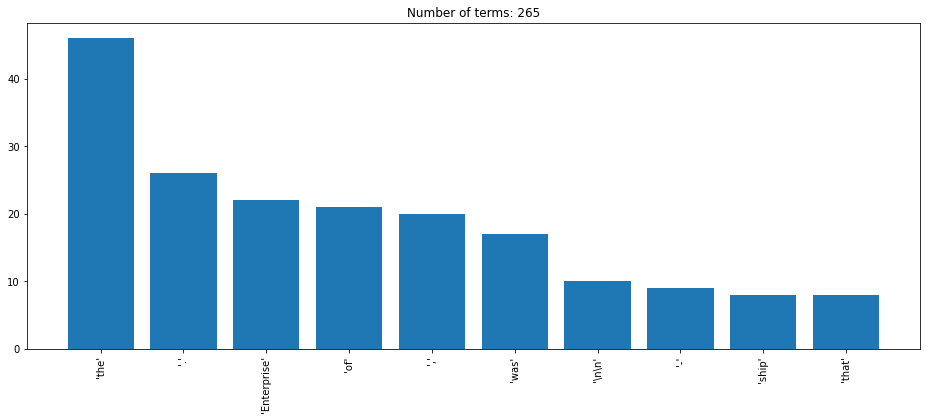

In [8]:
plot_words(['%r' % t.text for t in doc])

## Tokenise

In [9]:
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.': #will stop as soon as it his the .
        break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701'
 5| '-'
 6| 'D'
 7| ')'
 8| '\n\n'
 9| 'For'
10| 'five'
11| 'hundred'
12| 'years'
13| ','
14| 'every'
15| 'ship'
16| 'that'
17| 'has'
18| 'borne'
19| 'the'
20| 'name'
21| 'of'
22| 'the'
23| 'Enterprise'
24| 'has'
25| 'become'
26| 'a'
27| 'legend'
28| '.'


### Stop Words

In [10]:
print('i | with stop words without')
print('--| --------------- ------------')

for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))


    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701'      'NCC-1701'
 5| '-'             '-'
 6| 'D'             'D'
 7| ')'             ')'
 8| '\n\n'          '\n\n'
 9| 'For'           ''
10| 'five'          ''
11| 'hundred'       ''
12| 'years'         'years'
13| ','             ','
14| 'every'         ''
15| 'ship'          'ship'
16| 'that'          ''
17| 'has'           ''
18| 'borne'         'borne'
19| 'the'           ''
20| 'name'          ''
21| 'of'            ''
22| 'the'           ''
23| 'Enterprise'    'Enterprise'
24| 'has'           ''
25| 'become'        ''
26| 'a'             ''
27| 'legend'        'legend'
28| '.'             '.'


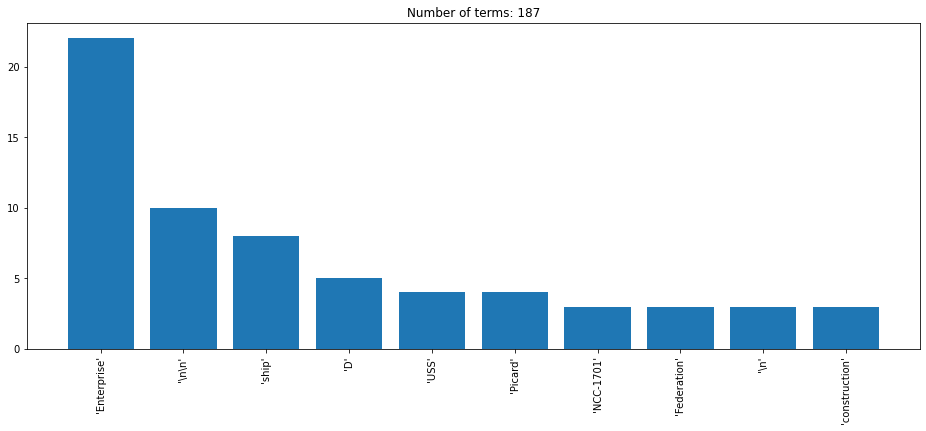

In [11]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

### Check Part of Speech

In [12]:
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701'   : PROPN NNP
 5|'-'          : PUNCT HYPH
 6|'D'          : NOUN  NN
 7|')'          : PUNCT -RRB-
 8|'\n\n'       : SPACE _SP
 9|'For'        : ADP   IN
10|'five'       : NUM   CD
11|'hundred'    : NUM   CD
12|'years'      : NOUN  NNS
13|','          : PUNCT ,
14|'every'      : DET   DT
15|'ship'       : NOUN  NN
16|'that'       : DET   WDT
17|'has'        : AUX   VBZ
18|'borne'      : VERB  VBN
19|'the'        : DET   DT
20|'name'       : NOUN  NN
21|'of'         : ADP   IN
22|'the'        : DET   DT
23|'Enterprise' : NOUN  NN
24|'has'        : AUX   VBZ
25|'become'     : VERB  VBN
26|'a'          : DET   DT
27|'legend'     : NOUN  NN
28|'.'          : PUNCT .


### Lemmatisation

In [13]:
for t in doc:
    print(t.lemma_)

USS
Enterprise
(
NCC-1701
-
d
)



for
five
hundred
year
,
every
ship
that
have
bear
the
name
of
the
enterprise
have
become
a
legend
.
this
one
be
no
different
.



the
USS
Enterprise
(
NCC-1701
-
d
)
be
a
24th
century
United
Federation
of
Planets
Galaxy
Class
starship
operate
by
Starfleet
,
and
the
fifth
Federation
ship
to
bear
the
name
enterprise
.
during
her
career
,
the
enterprise
serve
as
the
Federation
flagship
.
the
enterprise
be
destroy
during
the
Battle
of
Veridian
III
in
2371
.



history


construction
and
launch


the
Enterprise
be
build
at
Utopia
Planitia
Fleet
Yards
orbit
Mars
in
the
Solar
system
.
the
construction
be
a
massive
undertaking
,
involve
thousand
of
people
across
discipline
.
construction
be
supervise
by
Commander
Orfil
Quinteros
.
Dr.
Leah
Brahms
be
responsible
for
much
of
the
enterprise
's
warp
propulsion
system
design
.
some
of
the
Enterprise
's
component
be
derive
from
technology
originally
develop
on
the
USS
Pegasus
.



one
of
the
ship
's
nacelle
tube
be

In [14]:
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701'   'NCC-1701'
 5| '-'          '-'
 6| 'D'          'd'
 7| ')'          ')'
 8| '\n\n'       '\n\n'
 9| 'For'        'for'
10| 'five'       'five'
11| 'hundred'    'hundred'
12| 'years'      'year'
13| ','          ','
14| 'every'      'every'
15| 'ship'       'ship'
16| 'that'       'that'
17| 'has'        'have'
18| 'borne'      'bear'
19| 'the'        'the'
20| 'name'       'name'
21| 'of'         'of'
22| 'the'        'the'
23| 'Enterprise' 'enterprise'
24| 'has'        'have'
25| 'become'     'become'
26| 'a'          'a'
27| 'legend'     'legend'
28| '.'          '.'


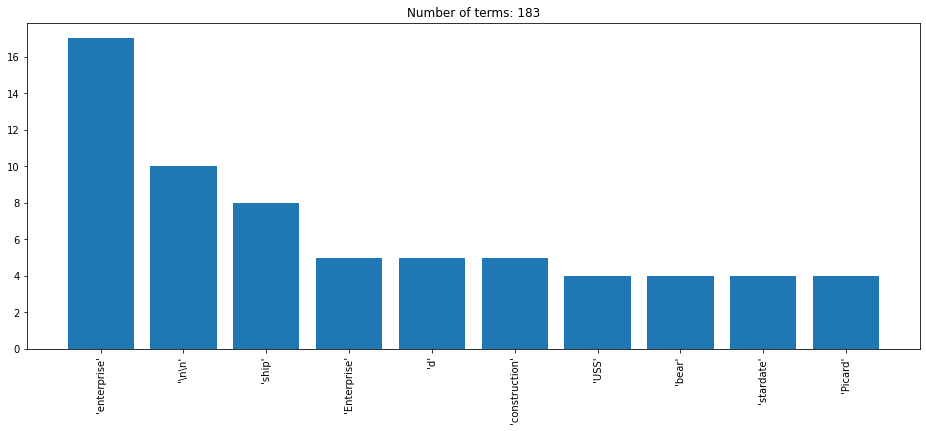

In [15]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [16]:
doc.sents

In [17]:
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise (NCC-1701-D)For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
DATE       : five hundred years
ORG        : Enterprise
 1: This one is no different.
 2: The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
PRODUCT    : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy
NORP       : Starfleet
 3: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Enterprise
ORG        : Federation
 4: The Enterprise was destroyed during the Battle of Veridian III in 2371.
-------------------------

## Extra: Using NLTK for NLP

### Tokenise

In [18]:
import nltk 

In [19]:
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| 'For'
 7| 'five'
 8| 'hundred'
 9| 'years'
10| ','
11| 'every'
12| 'ship'
13| 'that'
14| 'has'
15| 'borne'
16| 'the'
17| 'name'
18| 'of'
19| 'the'
20| 'Enterprise'
21| 'has'
22| 'become'
23| 'a'
24| 'legend'
25| '.'


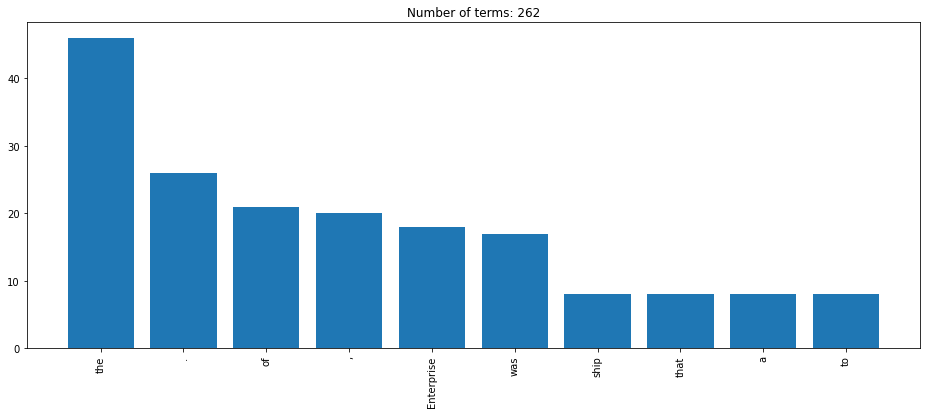

In [20]:
plot_words(tokens)

### Stop words

In [21]:
#nltk.download('stopwords')

In [22]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [23]:
tokens_no_stop = [t for t in tokens if t.lower() not in stopWords]# '' # create a list of tokens withOUT the stop words 
tokens_no_stop

['USS',
 'Enterprise',
 '(',
 'NCC-1701-D',
 ')',
 'five',
 'hundred',
 'years',
 ',',
 'every',
 'ship',
 'borne',
 'name',
 'Enterprise',
 'become',
 'legend',
 '.',
 'one',
 'different',
 '.',
 'USS',
 'Enterprise',
 '(',
 'NCC-1701-D',
 ')',
 '24th',
 'century',
 'United',
 'Federation',
 'Planets',
 'Galaxy',
 'Class',
 'starship',
 'operated',
 'Starfleet',
 ',',
 'fifth',
 'Federation',
 'ship',
 'bear',
 'name',
 'Enterprise',
 '.',
 'career',
 ',',
 'Enterprise',
 'served',
 'Federation',
 'flagship',
 '.',
 'Enterprise',
 'destroyed',
 'Battle',
 'Veridian',
 'III',
 '2371',
 '.',
 'History',
 'Construction',
 'launch',
 'Enterprise',
 'built',
 'Utopia',
 'Planitia',
 'Fleet',
 'Yards',
 'orbiting',
 'Mars',
 'Solar',
 'system',
 '.',
 'construction',
 'massive',
 'undertaking',
 ',',
 'involving',
 'thousands',
 'people',
 'across',
 'disciplines',
 '.',
 'Construction',
 'supervised',
 'Commander',
 'Orfil',
 'Quinteros',
 '.',
 'Dr.',
 'Leah',
 'Brahms',
 'responsible',
 

In [24]:
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')


while i < len(tokens):

    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1

    else:
        print('%2d| %-15r' % (i+1, tokens[i]))


    i += 1

    if tokens[i-1] == '.':
        break
        

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701-D'    'NCC-1701-D'
 5| ')'             ')'
 6| 'For'          
 7| 'five'          'five'
 8| 'hundred'       'hundred'
 9| 'years'         'years'
10| ','             ','
11| 'every'         'every'
12| 'ship'          'ship'
13| 'that'         
14| 'has'          
15| 'borne'         'borne'
16| 'the'          
17| 'name'          'name'
18| 'of'           
19| 'the'          
20| 'Enterprise'    'Enterprise'
21| 'has'          
22| 'become'        'become'
23| 'a'            
24| 'legend'        'legend'
25| '.'             '.'


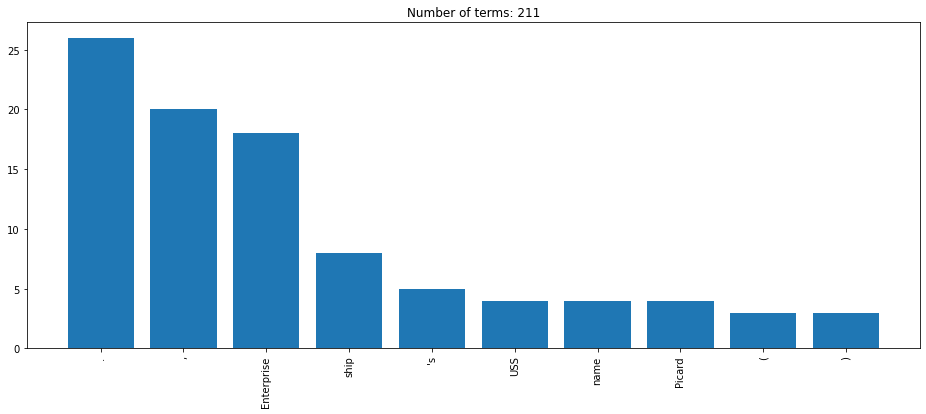

In [25]:
plot_words(tokens_no_stop)

### Check Part of Speech

In [26]:
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [27]:
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'('          : (    -
 4|'NCC-1701-D' : NNP  proper noun, singular "Harrison"
 5|')'          : )    -
 6|'For'        : IN   preposition/subordinating conjunction
 7|'five'       : CD   cardinal digit
 8|'hundred'    : CD   cardinal digit
 9|'years'      : NNS  noun plural "desks"
10|','          : ,    -
11|'every'      : DT   determiner
12|'ship'       : NN   noun, singular "desk"
13|'that'       : WDT  wh-determiner which
14|'has'        : VBZ  verb, 3rd person sing. present takes
15|'borne'      : VBN  verb, past participle taken
16|'the'        : DT   determiner
17|'name'       : NN   noun, singular "desk"
18|'of'         : IN   preposition/subordinating conjunction
19|'the'        : DT   determiner
20|'Enterprise' : NNP  proper noun, singular "Harrison"
21|'has'        : VBZ  verb, 3rd person sing. present takes
22|'become'     : VBN  verb, past participle taken
23|

### Stemming

In [28]:
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])
stemmed

"uss enterpris (ncc-1701-d) for five hundr years, everi ship that ha born the name of the enterpris ha becom a legend. thi one is no different. the uss enterpris (ncc-1701-d) wa a 24th centuri unit feder of planet galaxi class starship oper by starfleet, and the fifth feder ship to bear the name enterprise. dure her career, the enterpris serv as the feder flagship. the enterpris wa destroy dure the battl of veridian iii in 2371. histori construct and launch the enterpris wa built at utopia planitia fleet yard orbit mar in the solar system. the construct wa a massiv undertaking, involv thousand of peopl across disciplines. construct wa supervis by command orfil quinteros. dr. leah brahm wa respons for much of the enterprise' warp propuls system design. some of the enterprise' compon were deriv from technolog origin develop on the uss pegasus. one of the ship' nacel tube wa the site of a multipl murder-suicid while she wa still under construct at utopia planitia. A member of the construc

### Lemmatisation

In [29]:
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])
lemma

"USS Enterprise (NCC-1701-D) For five hundred years, every ship that ha borne the name of the Enterprise ha become a legend. This one is no different. The USS Enterprise (NCC-1701-D) wa a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served a the Federation flagship. The Enterprise wa destroyed during the Battle of Veridian III in 2371. History Construction and launch The Enterprise wa built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction wa a massive undertaking, involving thousand of people across disciplines. Construction wa supervised by Commander Orfil Quinteros. Dr. Leah Brahms wa responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's component were derived from technology originally developed on the USS Pegasus. One of the ship's nacelle tube wa the site of a multiple mur

In [30]:
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| '(ncc-1701-d)'   '(NCC-1701-D)'
 4| 'for'          'For'       
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'years,'       'years,'    
 8| 'everi'        'every'     
 9| 'ship'         'ship'      
10| 'that'         'that'      
11| 'ha'           'ha'        
12| 'born'         'borne'     
13| 'the'          'the'       
14| 'name'         'name'      
15| 'of'           'of'        
16| 'the'          'the'       
17| 'enterpris'    'Enterprise'
18| 'ha'           'ha'        
19| 'becom'        'become'    
20| 'a'            'a'         
21| 'legend.'      'legend.'   


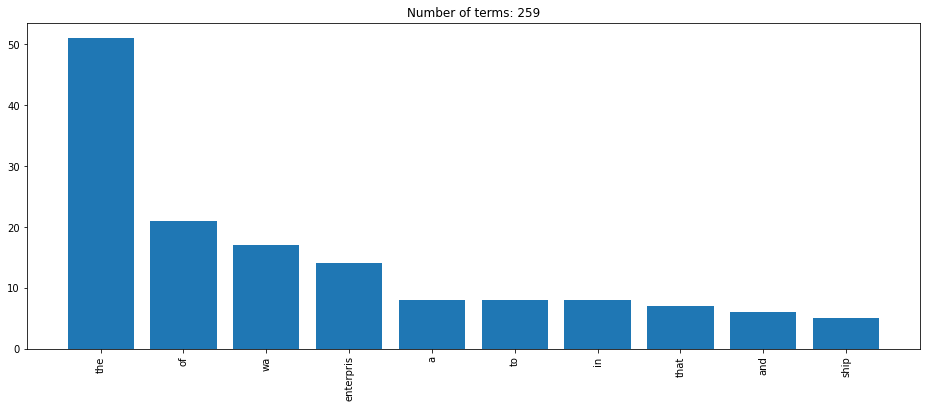

In [31]:
plot_words(stemmed.split())

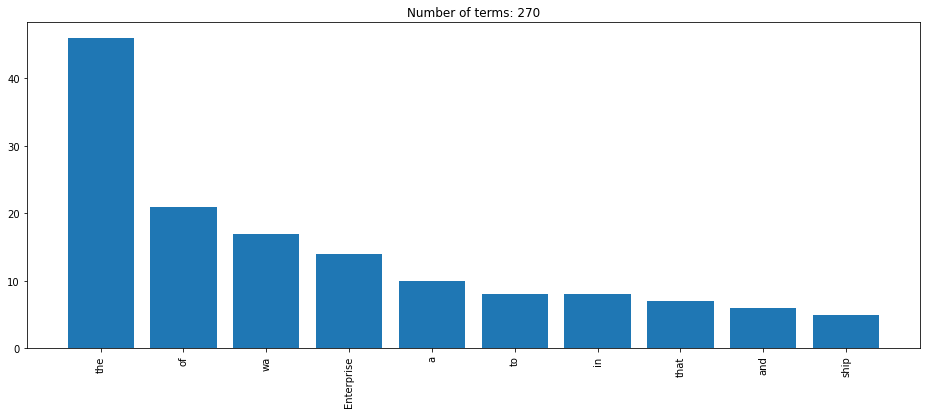

In [32]:
plot_words(lemma.split())

### Entity recognition

In [33]:
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Battle
GPE         : Veridian
PERSON      : History Construction
ORGANIZATION: Enterprise
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Pegasus
ORGANIZATION: Utopia Planitia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinley
PERSON      : Captain Jean-Luc Picard
ORGANIZATION: Rear Admiral Norah Satie
PERSON      : Legacy Commander Riker
ORGANIZATION: Enterprise
PERSON      : Picard
PERSON      : Deep Space
GPE         : Sta



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



